Nicholas Galea - 409904L

CIS3190 - Data Analytics Assignment

# Stage 1 - EDA Exploratory Data Analysis

In [135]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv("telecom_customer_churn.csv")

# Print column names to debug
for col in data.columns:
    print('Column:', col, '\t', data[col].dtype)
    print(data[col].unique())
    print()

In [ ]:
categorical_columns = ['InternetService', 'OnlineSecurity', 'MultipleLines',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
two_value_columns = ['gender']

columns = list(set(categorical_columns).union(yes_no_columns, two_value_columns))

print(columns)

# SeniorCitizen is already 0/1.

In [ ]:
# Display basic information about the dataset
print("Data Information")
data.info()

# Summary Statistics for Numerical Columns
print("Statistcs for Numerical Columns")
data.describe()

# Confirming that no 'nan' values are present
print("nan values")
data.isnull().sum()

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
# Plot the distribution of categorical features
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot the distribution of numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plot churn rates by categorical features
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=column, y=data['Churn'].map({'Yes': 1, 'No': 0}), palette='viridis')
    plt.title(f'Churn Rate by {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Convert Churn column from Yes/No to Binary 0/1
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# Convert Churn to numerical for correlation
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = data[numerical_columns + ['Churn']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# One-Hot-Encoding
print(data.columns)
print(data.head())

In [ ]:
# Check the columns list
print("Columns list:")
print(columns)

# Compare with DataFrame columns
print("DataFrame columns:")
print(data.columns)

# Check if all `columns` are in `data`
missing_columns = [col for col in columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All columns are present in the DataFrame.")

In [ ]:
# Dropping CustomerID (Not Needed)
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])

# Doing One-Hot-Encoding 

# 1. Gender Column: Male -> 0, Female -> 1
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
print("(Gender) Data Frame columns:", data.columns)

# 2. Converting Yes -> 1, No -> 0
for col in yes_no_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
print("Yes/No Data Frame columns:", data.columns)

# 3. One-Hot-Encoding Categorical Columns
# Function to generate one-hot mapping dynamically
def generate_one_hot_mapping(unique_values):
    mapping = {value: [1 if i == j else 0 for i in range(len(unique_values))]
        for j, value in enumerate(unique_values)}
    return mapping

for col in categorical_columns:
    # Generate the mapping dynamically
    
    unique_values = data[col].unique()  # Get unique values from the column
    one_hot_mapping = generate_one_hot_mapping(unique_values)
    
    # Replace string values with one-hot-encoded lists
    data[col] = data[col].map(one_hot_mapping)

# 4. Ensure all columns are numeric
# Convert all Boolean columns: True -> 1, False -> 0
data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# 5. Verify that all columns are numeric
# assert all(data.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number))), "Not all columns are numeric!"

# Check the results
print(data.head())

In [ ]:
# Non-Numeric Columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

print("Non-numeric columns:")
print(non_numeric_columns)

print(data.head(10))

In [133]:
df_X = data.drop(columns=['Churn'])
df_y = data['Churn']

# Convert dataframces to Numpy arrrays
X = df_X.to_numpy()
y = df_y.to_numpy()

print(data.head())
print()
print(df_X.head())
print()
print(df_y.head())
print()
print(X)
print()
print(y)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     [1, 0, 0]       [1, 0, 0]      [1, 0, 0]    [1, 0, 0]        [1, 0, 0]   
1     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
2     [0, 1, 0]       [1, 0, 0]      [0, 1, 0]    [1, 0, 0]        [1, 0, 0]   
3     [1, 0, 0]       [1, 0, 0]      [0, 1, 0]    [0, 1, 0]        [0, 1, 0]   
4     [0, 1, 0]       [0, 1, 0]      [1, 0, 0]    [0, 1, 0]        [1, 0, 0]   

  TechSupport StreamingTV StreamingMovies   Contract  PaperlessBilling  \
0   [1, 0, 0]   [1

In [ ]:
# Split the data into training(80%) and testing(20%) sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 19)
Shape of X_test: (1409, 19)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [ ]:
# Calculating Basic Statistics
    
print("Basic Statistics:")
print(data.describe()) 

print("\nMode for each column:")
print(data.mode().iloc[0])  # Get mode for each column

Basic Statistics:
            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.495244       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7043.000000       7043.000000     7043.000000   7032.000000   
mean       0.903166          0.592219       64.761692   2283.300441   
std        0.295752          0.491457       30.090047   2266.771362   
min        0.

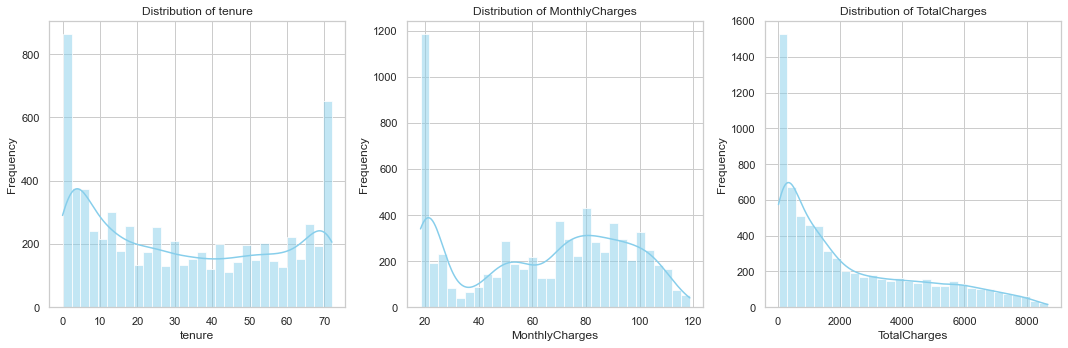

/Users/nicholasgalea/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nicholasgalea/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nicholasgalea/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

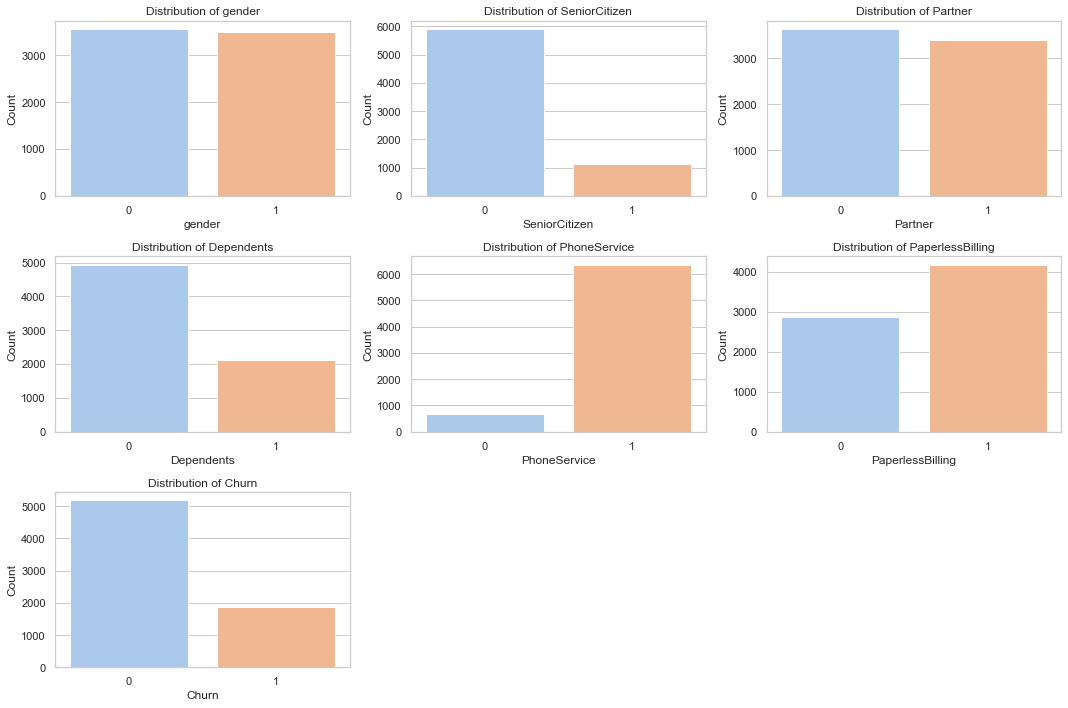

In [140]:
# Distribution of features

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style to be more aesthetic
sns.set(style="whitegrid")

# 1. Distribution of Numerical Features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color="skyblue")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Distribution of Categorical Features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'PaperlessBilling', 'Churn']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data[feature], palette="pastel")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
